### Regression with Multiple Variables

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics

In [2]:
%matplotlib notebook

Reading the data

In [3]:
df_raw = pd.read_csv('ex1data2.csv', header = None)

In [4]:
df_raw.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
df_raw.shape

(47, 3)

Feature Normalization

In [6]:
def normalizer(x):
    mean = x.mean()
    std = x.std()
    y = (x - mean)/std
    return y

In [7]:
norm_size, norm_bedrooms, norm_prices = normalizer(df_raw[0]), normalizer(df_raw[1]), normalizer(df_raw[2])

In [8]:
df_norm = pd.concat([norm_size, norm_bedrooms, norm_prices], axis = 1)
df_norm.head()

,0,1,2
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [9]:
df_norm.rename(columns = {0 : 'sizes', 1 : 'bedrooms', 2 : 'prices'}, inplace=True)

In [10]:
df_norm.head()

,sizes,bedrooms,prices
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Linear Regression

In [11]:
reg = linear_model.LinearRegression()

In [12]:
reg.fit(np.transpose(np.array([df_norm['sizes'], df_norm['bedrooms']])), df_norm['prices'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
reg.coef_

array([ 0.88476599, -0.05317882])

In [14]:
reg.intercept_

-9.268523297987521e-17

In [15]:
reg.score(np.transpose(np.array([df_norm['sizes'], df_norm['bedrooms']])), df_norm['prices'])

0.7329450180289143

De-Normalizing Data

In [19]:
max(df_raw[0]), max(df_raw[1]), max(df_raw[2])

(4478, 5, 699900)

In [21]:
min(df_raw[0]), min(df_raw[1]), min(df_raw[2])

(852, 1, 169900)

In [27]:
max_sz = (4478 - df_raw[0].mean())/df_raw[0].std()
min_sz = (852 - df_raw[0].mean())/df_raw[0].std()
max_br = (5 - df_raw[1].mean())/df_raw[1].std()
min_br = (1 - df_raw[1].mean())/df_raw[1].std()

In [23]:
sc_max = reg.predict(np.array([max_sz, max_br]).reshape(1,-1))

In [28]:
sc_min = reg.predict(np.array([min_sz, min_br]).reshape(1,-1))

In [29]:
sc_max, sc_min

(array([2.63020487]), array([-1.1272024]))

In [30]:
sc_max_r, sc_min_r = (sc_max*df_raw[2].std()) + df_raw[2].mean(), (sc_min*df_raw[2].std()) + df_raw[2].mean()

In [32]:
sc_max_r, sc_min_r

(array([669293.21223209]), array([199467.38469349]))

<IPython.core.display.Javascript object>


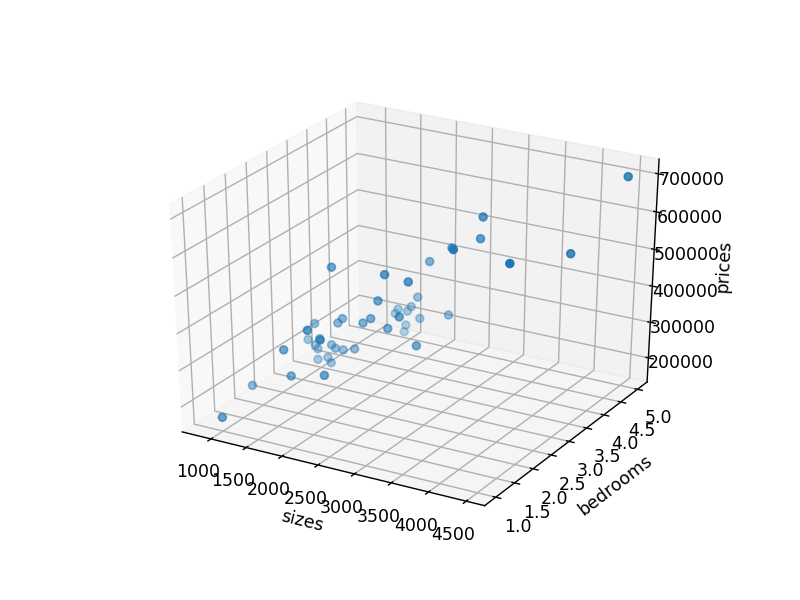

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (0,) and requested shape (3626,)

In [41]:
ax2 = plt.axes(projection='3d')
ax2.scatter3D(df_raw[0], df_raw[1], df_raw[2])
ax2.set_xlabel('sizes')
ax2.set_ylabel('bedrooms')
ax2.set_zlabel('prices')
ax2.plot3D(xr, yr, zr)
#ax2.plot3D([4478,852], [5,1], [sc_max_r, sc_min_r])

Plot

In [16]:
from mpl_toolkits import mplot3d

In [17]:
x_norm = np.arange(-2, 4)
y_norm = np.arange(-3, 3)
z_norm = reg.coef_[0]*x_norm + reg.coef_[1]*y_norm + reg.intercept_

<IPython.core.display.Javascript object>


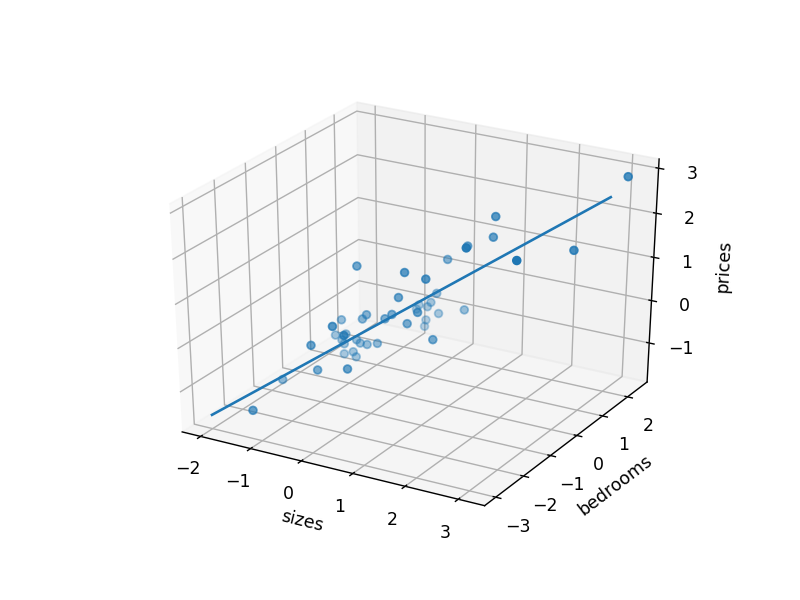

In [18]:
ax1 = plt.axes(projection='3d')
ax1.scatter3D(df_norm['sizes'], df_norm['bedrooms'], df_norm['prices'])
ax1.set_xlabel('sizes')
ax1.set_ylabel('bedrooms')
ax1.set_zlabel('prices')
ax1.plot3D(x_norm, y_norm ,z_norm)

Cost Function

In [16]:
def cost_func(x, y, n):
    u = x-y
    u = u*u
    u = np.sum(u)
    u = u/(2*n)
    return u

In [17]:
z_hat = reg.coef_[0]*df_norm['sizes'] + reg.coef_[1]*df_norm['bedrooms'] + reg.intercept_

In [18]:
cost = cost_func(x = z_hat, y = df_norm['prices'], n = df_norm.shape[0])

In [19]:
cost

0.13068648053904192

Prediction

In [20]:
# Predict price of a house with size of 1650 sq.ft & 3 bedrooms
sz, br = 1650, 3
sz_norm = (1650 - df_raw[0].mean())/df_raw[0].std()
br_norm = (3 - df_raw[1].mean())/df_raw[1].std()

In [23]:
pr_norm = reg.predict(np.array([sz_norm, br_norm]).reshape(1, -1))

In [24]:
pr = (pr_norm*df_raw[2].std()) + df_raw[2].mean()

In [25]:
pr

array([293081.4643349])